In [87]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np


In [88]:
import numpy as np
import librosa
import sklearn
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report


ses kaydı ekleme

In [86]:
import sounddevice as sd
from scipy.io.wavfile import write

# Örnekleme oranı ve süre ayarları
samplerate = 44100  # Saniyede 44,100 örnek al
duration = 30  # Kayıt süresi (saniye)
filename = "kayit1.wav"  # Kaydedilecek dosyanın adı

print("Kayıt başlıyor...")
# Ses kaydı yap
ses_verisi = sd.rec(int(samplerate * duration), samplerate=samplerate, channels=1, dtype='int16')
sd.wait()  # Kayıt tamamlanana kadar bekle

# Kaydedilen sesi dosyaya yaz
write(filename, samplerate, ses_verisi)
print(f"Kayıt tamamlandı. '{filename}' dosyasına kaydedildi.")

Kayıt başlıyor...


KeyboardInterrupt: 

In [ ]:
import sounddevice as sd
from scipy.io.wavfile import write

# Örnekleme oranı ve süre ayarları
samplerate = 44100  # Saniyede 44,100 örnek al
duration = 30  # Kayıt süresi (saniye)
filename = "kayit2.wav"  # Kaydedilecek dosyanın adı

print("Kayıt başlıyor...")
# Ses kaydı yap
ses_verisi = sd.rec(int(samplerate * duration), samplerate=samplerate, channels=1, dtype='int16')
sd.wait()  # Kayıt tamamlanana kadar bekle

# Kaydedilen sesi dosyaya yaz
write(filename, samplerate, ses_verisi)
print(f"Kayıt tamamlandı. '{filename}' dosyasına kaydedildi.")

Kayıt başlıyor...
Kayıt tamamlandı. 'kayit2.wav' dosyasına kaydedildi.


In [52]:
# Ses dosyalarını yükleyin
kayıt1, sr1 = librosa.load("kayit1.wav", sr=None)
kayıt2, sr2 = librosa.load("kayit2.wav", sr=None)


dalga formu ve MFCC görsellerini oluşturma

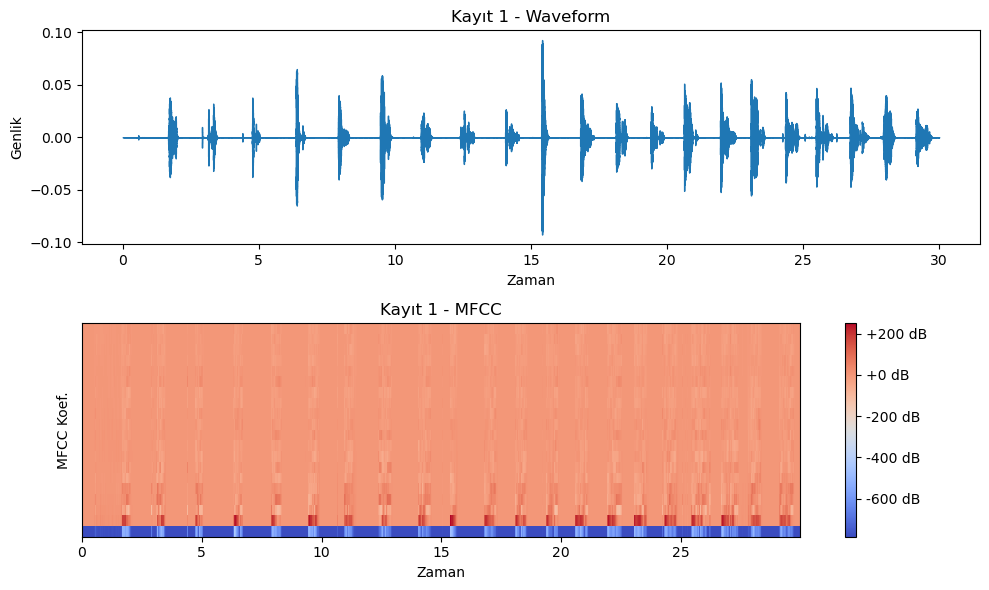

In [53]:
# Kayıt 1 için
plt.figure(figsize=(10, 6))

# Dalga Formu
plt.subplot(2, 1, 1)
plt.title("Kayıt 1 - Waveform")
librosa.display.waveshow(kayıt1, sr=sr1)
plt.xlabel("Zaman")
plt.ylabel("Genlik")

# MFCC Görselleştirme
mfccs1 = librosa.feature.mfcc(y=kayıt1, sr=sr1, n_mfcc=20)
plt.subplot(2, 1, 2)
librosa.display.specshow(mfccs1, x_axis='time', sr=sr1)
plt.colorbar(format='%+2.0f dB')
plt.title("Kayıt 1 - MFCC")
plt.xlabel("Zaman")
plt.ylabel("MFCC Koef.")
plt.tight_layout()
plt.show()


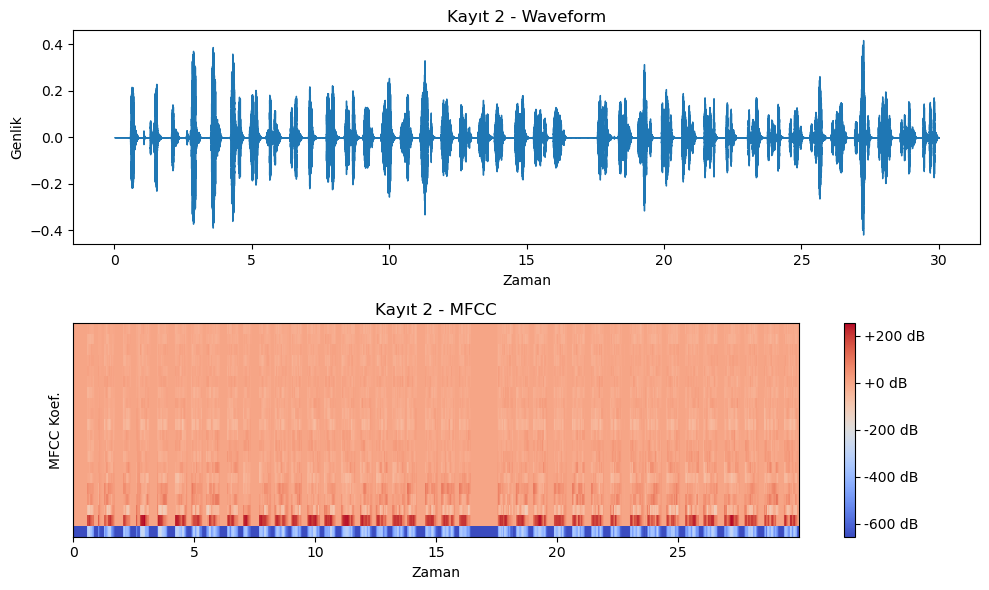

In [54]:
# Kayıt 2 için
plt.figure(figsize=(10, 6))

# Dalga Formu
plt.subplot(2, 1, 1)
plt.title("Kayıt 2 - Waveform")
librosa.display.waveshow(kayıt2, sr=sr2)
plt.xlabel("Zaman")
plt.ylabel("Genlik")

# MFCC Görselleştirme
mfccs2 = librosa.feature.mfcc(y=kayıt2, sr=sr2, n_mfcc=20)
plt.subplot(2, 1, 2)
librosa.display.specshow(mfccs2, x_axis='time', sr=sr2)
plt.colorbar(format='%+2.0f dB')
plt.title("Kayıt 2 - MFCC")
plt.xlabel("Zaman")
plt.ylabel("MFCC Koef.")
plt.tight_layout()
plt.show()


histogramı oluşturma

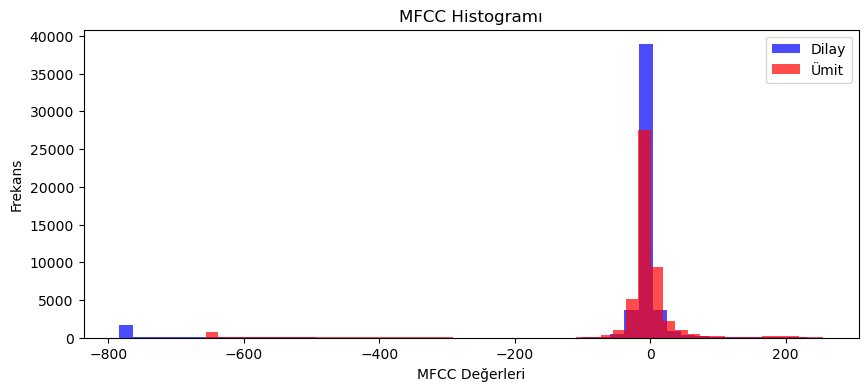

In [55]:
# MFCC Histogramı
plt.figure(figsize=(10, 4))
plt.hist(mfccs1.flatten(), bins=50, color='blue', alpha=0.7, label='Dilay')
plt.hist(mfccs2.flatten(), bins=50, color='red', alpha=0.7, label='Ümit')
plt.title("MFCC Histogramı")
plt.xlabel("MFCC Değerleri")
plt.ylabel("Frekans")
plt.legend()
plt.show()


Ses tanıma modeli oluşturmak ve performans metriklerini (ACC, Precision, F1-Score) hesaplama

Her bir ses dosyasından MFCC özelliklerini çıkaracağız:

In [56]:
pip install soundfile


Note: you may need to restart the kernel to use updated packages.


In [57]:
import librosa
import soundfile as sf
import os

def split_audio(audio_path, output_folder, segment_duration=5):
    """
    Ses dosyasını belirli uzunluklarda parçalara ayırır ve çıktı dosyasına yazar.

    :param audio_path: Ses dosyasının yolu
    :param output_folder: Çıktı dosyalarının yazılacağı klasör
    :param segment_duration: Parça uzunluğu (saniye)
    """
    # Ses dosyasını yükle
    audio, sr = librosa.load(audio_path, sr=None)
    segment_length = sr * segment_duration  # Parça uzunluğu (örnekleme cinsinden)

    # Çıktı klasörünü oluştur
    os.makedirs(output_folder, exist_ok=True)

    # Ses dosyasını parçala ve kaydet
    for i in range(0, len(audio), segment_length):
        segment = audio[i:i + segment_length]
        if len(segment) == segment_length:  # Tam uzunlukta parça
            file_name = f"{output_folder}/segment_{i // segment_length}.wav"
            sf.write(file_name, segment, sr)  # Parçayı kaydet
            print(f"{file_name} kaydedildi.")


In [58]:
split_audio("kayit1.wav", "output_kayit1")  # Kayıt1'i parçalara ayır
split_audio("kayit2.wav", "output_kayit2")  # Kayıt2'yi parçalara ayır


output_kayit1/segment_0.wav kaydedildi.
output_kayit1/segment_1.wav kaydedildi.
output_kayit1/segment_2.wav kaydedildi.
output_kayit1/segment_3.wav kaydedildi.
output_kayit1/segment_4.wav kaydedildi.
output_kayit1/segment_5.wav kaydedildi.
output_kayit2/segment_0.wav kaydedildi.
output_kayit2/segment_1.wav kaydedildi.
output_kayit2/segment_2.wav kaydedildi.
output_kayit2/segment_3.wav kaydedildi.
output_kayit2/segment_4.wav kaydedildi.
output_kayit2/segment_5.wav kaydedildi.


In [59]:
import os
for file in os.listdir("output_kayit1"):
    print(f"Parça: {file}")


Parça: segment_0.wav
Parça: segment_1.wav
Parça: segment_2.wav
Parça: segment_3.wav
Parça: segment_4.wav
Parça: segment_5.wav


Parçalanmış ses dosyalarından özellikleri çıkaracağız. MFCC ve Delta MFCC kullanacağız.

In [60]:
import librosa
import numpy as np
import os

def extract_features_from_folder(folder_path, label):
    """
    Belirli bir klasörden MFCC ve Delta MFCC özelliklerini çıkarır.
    
    :param folder_path: Ses dosyalarının bulunduğu klasör
    :param label: Bu klasördeki ses dosyalarına atanacak etiket (örneğin, 0 veya 1)
    :return: Özellikler (X) ve etiketler (y)
    """
    features = []
    labels = []

    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        audio, sr = librosa.load(file_path, sr=None)
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=20).T
        delta_mfcc = librosa.feature.delta(mfcc)
        
        # MFCC ve Delta MFCC'yi birleştir
        combined_features = np.hstack((mfcc, delta_mfcc))
        features.append(combined_features)
        labels.extend([label] * len(combined_features))  # Her özellik için aynı etiketi ekle

    return np.vstack(features), np.array(labels)

# Kayıt1 ve Kayıt2 için özellik çıkarma
X_kayit1, y_kayit1 = extract_features_from_folder("output_kayit1", label=0)  # Kayıt1 için etiket = 0
X_kayit2, y_kayit2 = extract_features_from_folder("output_kayit2", label=1)  # Kayıt2 için etiket = 1

# Tüm özellikleri ve etiketleri birleştir
X = np.vstack((X_kayit1, X_kayit2))
y = np.hstack((y_kayit1, y_kayit2))


Veri setini eğitim ve test olarak ayırıyoruz. Bu, modelin performansını doğru bir şekilde değerlendirmek için önemlidir.

In [61]:
from sklearn.model_selection import train_test_split

# Eğitim ve test veri setlerini ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Eğitim verisi boyutu: {X_train.shape}, Test verisi boyutu: {X_test.shape}")


Eğitim verisi boyutu: (4137, 40), Test verisi boyutu: (1035, 40)


SVM (Support Vector Machine), iki sınıfı birbirinden ayırt etmek için güçlü bir sınıflandırma yöntemidir.


In [62]:
from sklearn.svm import SVC

# SVM modeli oluştur ve eğit
svm = SVC(kernel="linear", random_state=42)
svm.fit(X_train, y_train)

# Test veri setinde tahmin yap
y_pred = svm.predict(X_test)

print("Model eğitimi tamamlandı.")


Model eğitimi tamamlandı.


Modelin doğruluk (accuracy), hassasiyet (precision), ve F1-Skoru gibi metriklerini hesaplayarak performansını değerlendirdik.

Performans Değerleri:
Doğruluk (Accuracy): 1.00
Hassasiyet (Precision): 1.00
F1-Skoru: 1.00

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       531
           1       1.00      1.00      1.00       504

    accuracy                           1.00      1035
   macro avg       1.00      1.00      1.00      1035
weighted avg       1.00      1.00      1.00      1035



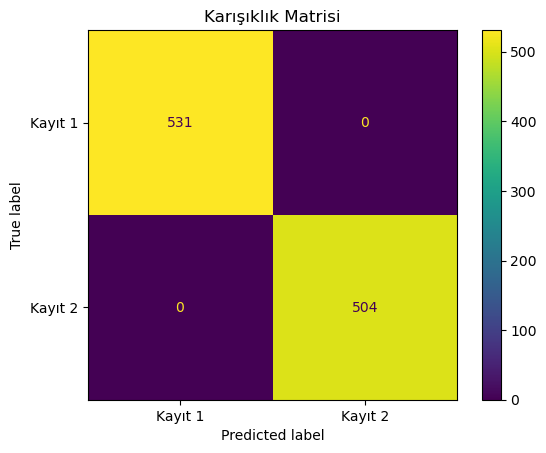

In [63]:
from sklearn.metrics import accuracy_score, precision_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Performans metrikleri
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print("Performans Değerleri:")
print(f"Doğruluk (Accuracy): {accuracy:.2f}")
print(f"Hassasiyet (Precision): {precision:.2f}")
print(f"F1-Skoru: {f1:.2f}")

# Detaylı sınıflandırma raporu
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))

# Karışıklık matrisi
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Kayıt 1", "Kayıt 2"])
disp.plot(cmap="viridis")
plt.title("Karışıklık Matrisi")
plt.show()


burda yukarda yaptıklarımızı tek  bir kodda birleştirdik.yani bir model eğittik yukardaki eğitilmedi.(silebilirdim ama kaldı asıl model altatki satırda)

Ses tanıma modelinin oluşturulması ve bu modelden ACC, FM gibi değerlerinin Makine Öğrenimi ile bulunması  işlemini burda gerçekleştiridk.

In [10]:
import librosa
import numpy as np
import os
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# 1. Özellik Çıkarma Fonksiyonu
def extract_features_from_folder(folder_path, label):
    features = []
    labels = []

    for file_name in os.listdir(folder_path):
        file_path = os.path.join(folder_path, file_name)
        audio, sr = librosa.load(file_path, sr=None)
        mfcc = librosa.feature.mfcc(y=audio, sr=sr, n_mfcc=20).T
        delta_mfcc = librosa.feature.delta(mfcc)
        combined_features = np.hstack((mfcc, delta_mfcc))
        features.append(combined_features)
        labels.extend([label] * len(combined_features))  # Her özellik için aynı etiketi ekle

    return np.vstack(features), np.array(labels)

# 2. Kayıt1 ve Kayıt2 için Özellik Çıkarma
X_kayit1, y_kayit1 = extract_features_from_folder("output_kayit1", label=0)  # Kayıt1 için etiket = 0
X_kayit2, y_kayit2 = extract_features_from_folder("output_kayit2", label=1)  # Kayıt2 için etiket = 1

# 3. Tüm Özellikleri ve Etiketleri Birleştirme
X = np.vstack((X_kayit1, X_kayit2))
y = np.hstack((y_kayit1, y_kayit2))

# 4. Veriyi Eğitim ve Test Seti Olarak Ayırma
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. SVM Modeli Oluşturma ve Eğitme
svm = SVC(kernel="linear", random_state=42)
svm.fit(X_train, y_train)  # Modeli eğitiyoruz
print("Model eğitimi tamamlandı.")

# 6. Test Veri Setinde Tahmin Yapma
y_pred = svm.predict(X_test)

# 7. Performans Değerlendirme
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Performans değerlerini yazdır
print("Performans Değerleri:")
print(f"Doğruluk (Accuracy): {accuracy:.2f}")
print(f"Hassasiyet (Precision): {precision:.2f}")
print(f"Duyarlılık (Recall): {recall:.2f}")
print(f"F1-Skoru (F1-Score): {f1:.2f}")

# Detaylı sınıflandırma raporu
print("\nSınıflandırma Raporu:")
print(classification_report(y_test, y_pred))


Model eğitimi tamamlandı.
Performans Değerleri:
Doğruluk (Accuracy): 1.00
Hassasiyet (Precision): 1.00
Duyarlılık (Recall): 1.00
F1-Skoru (F1-Score): 1.00

Sınıflandırma Raporu:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       531
           1       1.00      1.00      1.00       504

    accuracy                           1.00      1035
   macro avg       1.00      1.00      1.00      1035
weighted avg       1.00      1.00      1.00      1035



In [11]:
from sklearn.utils.validation import check_is_fitted

try:
    check_is_fitted(svm)
    print("Model eğitilmiş ve kullanıma hazır.")
except:
    print("Model henüz eğitilmemiş!")



Model eğitilmiş ve kullanıma hazır.


In [12]:
import pickle

with open("svm_model.pkl", "wb") as f:
    pickle.dump(svm, f)
print("Model kaydedildi.")


Model kaydedildi.


In [13]:

import pickle

with open("svm_model.pkl", "rb") as f:
    svm = pickle.load(f)

print("Model başarıyla yüklendi!")


Model başarıyla yüklendi!


yeni bir ses kaydediyoruz.bu dosyanın adı deneme_kayit

In [68]:
import sounddevice as sd
from scipy.io.wavfile import write

# Ses kaydı parametreleri
fs = 44100  # Örnekleme frekansı (44.1 kHz)
duration = 5  # Kaydın süresi (saniye)

# Ses kaydını başlat
print("Ses kaydı başlıyor...")
yeni_ses = sd.rec(int(duration * fs), samplerate=fs, channels=1, dtype='int16')
sd.wait()  # Kaydın bitmesini bekle
print("Ses kaydedildi!")

# Kaydedilen sesi bir dosyaya yazma
write("deneme_kayit.wav", fs, yeni_ses)
print("Ses deneme_kayit.wav dosyasına kaydedildi.")


Ses kaydı başlıyor...
Ses kaydedildi!
Ses deneme_kayit.wav dosyasına kaydedildi.


kaydettiğimiz sesi model bulabiliyor mu bu kodda ona baktık.(evet model doğru tahmin etti)()

In [69]:
# Yeni bir ses dosyasını yükle ve özelliklerini çıkar
yeni_ses, sr = librosa.load("deneme_kayit.wav", sr=None)
yeni_mfcc = librosa.feature.mfcc(y=yeni_ses, sr=sr, n_mfcc=20).T
yeni_delta_mfcc = librosa.feature.delta(yeni_mfcc)
yeni_features = np.hstack((yeni_mfcc, yeni_delta_mfcc))

# SVM modeliyle tahmin yap
yeni_tahmin = svm.predict(yeni_features)

# Çoğunluk oyu ile hangi sınıfa ait olduğunu belirleme
from collections import Counter
grup = Counter(yeni_tahmin).most_common(1)[0][0]
print(f"Bu ses {grup}. gruba ait (Kayıt {grup + 1}).")

Bu ses 0. gruba ait (Kayıt 1).


şimdi anlık sesten kişilerin tanımlanması üzerinde çalıştık.burda eğittiğimiz modeli tekar yükleyip onun üzerinden anlık sesten kişileri tanır ve grafikleşirerek hangi kişi ne kadar konuşmuş görselleştirir.

In [4]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [14]:
import sounddevice as sd
import librosa
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from collections import Counter

# Model ve konuşmacı isimleri
class_names = ["Dilay", "Ümit"]  # Konuşmacı etiketleri (Sessizlik çıkarıldı)
svm = SVC(kernel="linear", random_state=42)  # Eğitilmiş SVM modeli (eğitilmiş olmalı)

# Konuşmacı sürelerini tutmak için sözlük
speaker_durations = {name: 0 for name in class_names}

def process_audio(indata, samplerate, model, class_names):
    """
    Ses verisini işler ve konuşmacıyı tanımlar.
    """
    mfcc = librosa.feature.mfcc(y=indata.flatten(), sr=samplerate, n_mfcc=20).T
    delta_mfcc = librosa.feature.delta(mfcc)
    combined_features = np.hstack((mfcc, delta_mfcc))
    
    # Model tahmini
    predictions = model.predict(combined_features)
    speaker = Counter(predictions).most_common(1)[0][0]  # Çoğunluk oyu
    return class_names[speaker]

def start_real_time_recognition(model, class_names, duration=30):
    """
    Gerçek zamanlı konuşmacı tanıma ve süre toplama.
    """
    global speaker_durations
    speaker_durations = {name: 0 for name in class_names}  # Süreleri sıfırla
    chunk_duration = 2  # Her segment 2 saniye
    samplerate = 44100  # Örnekleme frekansı
    blocksize = samplerate * chunk_duration  # Segment uzunluğu
    
    def callback(indata, frames, time, status):
        global speaker_durations
        if status:
            print(status)
        # Sesi işleyerek konuşmacıyı tanımla
        speaker = process_audio(indata, samplerate, model, class_names)
        if speaker in speaker_durations:  # Sadece "Dilay" ve "Ümit" dahil
            speaker_durations[speaker] += chunk_duration
        
        # Süreleri görselleştir
        plt.clf()
        plt.bar(speaker_durations.keys(), speaker_durations.values(), color=["blue", "green"])
        plt.title("Konuşmacı Süreleri")
        plt.xlabel("Konuşmacılar")
        plt.ylabel("Süre (saniye)")
        plt.pause(0.01)

    # Mikrofonla dinleme
    with sd.InputStream(callback=callback, channels=1, samplerate=samplerate, blocksize=blocksize):
        print(f"Mikrofon dinleniyor... Toplam süre: {duration} saniye. Çıkmak için Ctrl+C'ye basın.")
        plt.figure()
        plt.ion()  # Gerçek zamanlı grafik
        plt.show()
        try:
            sd.sleep(duration * 1000)  # Süre sonunda otomatik durur
        except KeyboardInterrupt:
            print("Dinleme durduruldu.")


In [15]:
with open("svm_model.pkl", "rb") as f:
    svm = pickle.load(f)
print("Model yüklendi.")

Model yüklendi.


In [7]:
# Model ve konuşmacı isimleri
class_names = ["Dilay", "Ümit"]

# Gerçek zamanlı tanımayı başlat
start_real_time_recognition(svm, class_names, duration=30)  # 30 saniyelik dinleme


Mikrofon dinleniyor... Toplam süre: 30 saniye. Çıkmak için Ctrl+C'ye basın.


<Figure size 640x480 with 0 Axes>

From cffi callback <function _StreamBase.__init__.<locals>.callback_ptr at 0x0000025E3F02FE18>:
Traceback (most recent call last):
  File "c:\Users\Dilay\.conda\envs\py37\lib\site-packages\sounddevice.py", line 857, in callback_ptr
    return _wrap_callback(callback, data, frames, time, status)
  File "c:\Users\Dilay\.conda\envs\py37\lib\site-packages\sounddevice.py", line 2735, in _wrap_callback
    callback(*args)
  File "C:\Users\Dilay\AppData\Local\Temp\ipykernel_29064\2039863981.py", line 43, in callback
  File "C:\Users\Dilay\AppData\Local\Temp\ipykernel_29064\2039863981.py", line 24, in process_audio
  File "c:\Users\Dilay\.conda\envs\py37\lib\site-packages\sklearn\svm\_base.py", line 778, in predict
    check_is_fitted(self)
  File "c:\Users\Dilay\.conda\envs\py37\lib\site-packages\sklearn\utils\validation.py", line 1222, in check_is_fitted
    raise NotFittedError(msg % {"name": type(estimator).__name__})
sklearn.exceptions.NotFittedError: This SVC instance is not fitted yet. 

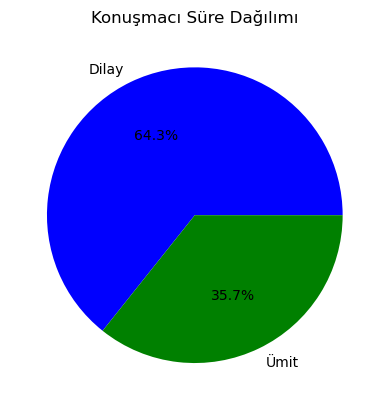

In [47]:
# Pasta grafiği ile sürelerin gösterimi
plt.figure()
plt.pie(speaker_durations.values(), labels=speaker_durations.keys(), autopct='%1.1f%%', colors=["blue", "green", "gray"])
plt.title("Konuşmacı Süre Dağılımı")
plt.show()
